# import packages

In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# read data

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data = data.applymap(str) # change all values to string

# methods

## prepare labels

In [3]:
# takes as input a dataframe and the specific category of labels
# removes the white space, igonores empty labels, and split multiple labels that are in one cell
# returns a dataframe and list of all labels, and the total number of labels in this category

def prepare_labels(df_input, category):

    list_labels = []

    for label in df_input[category]:
        label = label.replace(" ", "") # remove whitespace
        if label == 'nan': # ignore empty labels
            continue
        elif ',' in label: # split labels seperated by comma's
            chunks = label.split(',')
            for chunk in chunks:
                list_labels.append(chunk)
        else:
            list_labels.append(label)
            
    n_labels = len(list_labels)
    df_labels = pd.DataFrame(list_labels, columns=[category])
     
    return df_labels, list_labels, n_labels

## make histogram

In [4]:
# takes as input a dictionary (labels + frequency) and the category name
# then a histogram is constructed and saved as a png

def make_hist(dict_labels, category_name, scale):   

    # make dataframe
    df_labels = pd.DataFrame(list(dict_labels.items()))
    df_labels.columns = [category_name,'Frequency']
    
    # sort frequency descending
    df_labels = df_labels.sort_values(['Frequency'],ascending=False).reset_index(drop=True)
    
    # plot
    ax = sns.barplot(x=category_name, y="Frequency", data=df_labels, color="#636363")
    ax.set(ylim=(0, scale))
    plt.xticks(rotation=90) # rotate label names on x-axis
    plt.xlabel("") # delete x label
    plt.savefig("figures/" + category_name +".png",bbox_inches='tight')

# make plots for all data

In [5]:
df_name = "All data"
scale = len(data.index)

{'Reduce energy': 110, 'Monitor': 23, 'Increase EE': 81, 'Reduce costs': 9, 'Renewable': 15}


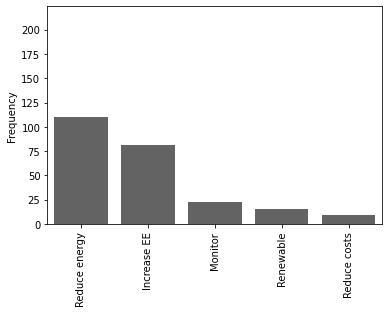

In [6]:
### GOAL

# prepare data
category = 'goal'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count and print frequencies 
dict_labels = ({'Reduce energy':list_labels.count('reduce_energy'), 'Monitor':list_labels.count('monitor'), 'Increase EE':list_labels.count('increase_EE'), 'Reduce costs':list_labels.count('reduce_cost'), 'Renewable':list_labels.count('optimize_renewable')})
print(dict_labels)
    
# plot
category_name = df_name + ": Energy related goal"
make_hist(dict_labels, category_name, scale)

{'VM consolidation': 100, 'Resource': 79, 'Predict': 14, 'Model': 15, 'VM placement': 37, 'VM selection': 12, 'Network': 31, 'VM migration': 27, 'Measure': 5, 'Container': 6, 'Other': 4}


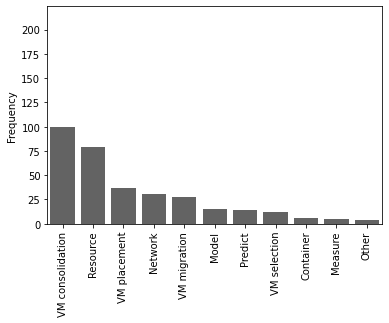

In [7]:
### STRATEGY

# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Predict':list_labels.count('predict'), 'Model':list_labels.count('model'), 'VM placement':list_labels.count('VM_placement'), 'VM selection':list_labels.count('VM_selection'), 'Network':list_labels.count('network_optimization'), 'VM migration':list_labels.count('VM_migration'), 'Measure':list_labels.count('measure'), 'Container':list_labels.count('containerization'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Strategy type"
make_hist(dict_labels, category_name, scale)

{'Nature': 20, 'ML': 36, 'Fit': 24, 'LP': 21, 'Other': 60, 'GP': 9, 'Fuzzy': 3, 'DVFS': 5}


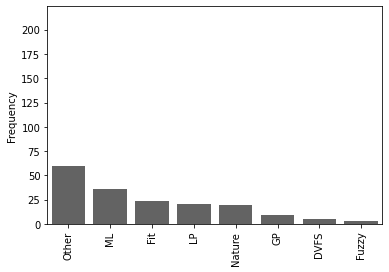

In [8]:
### ALGORITMS

# prepare data
category = 'algorithms'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'Nature':list_labels.count('nature'), 'ML':list_labels.count('ML'), 'Fit':list_labels.count('fit'), 'LP':list_labels.count('LP'), 'Other':list_labels.count('other') + list_labels.count('round_robin'), 'GP':list_labels.count('GP'), 'Fuzzy':list_labels.count('fuzzy'), 'DVFS':list_labels.count('DVFS')})
print(dict_labels)

# plot
category_name = df_name + ": Algorithms and techniques"
make_hist(dict_labels, category_name, scale)

{'Completely': 212, 'Depends': 7, 'Partly': 5}


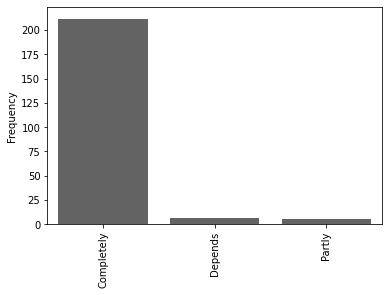

In [9]:
### SOFTWARE-DRIVEN

# prepare data
category = 'software-driven'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'Completely':list_labels.count('completely_consists_of'), 'Depends':list_labels.count('depends_on'), 'Partly':list_labels.count('partly_consists_of')})
print(dict_labels)

# plot
category_name = df_name + ": Software-driven" 
make_hist(dict_labels, category_name, scale)

{'Power consumption': 53, 'Energy consumption': 126, 'Renewable': 15, 'Energy efficiency': 43, 'Energy & SLA': 9, 'Supporting & ICT': 8, 'Other': 4}


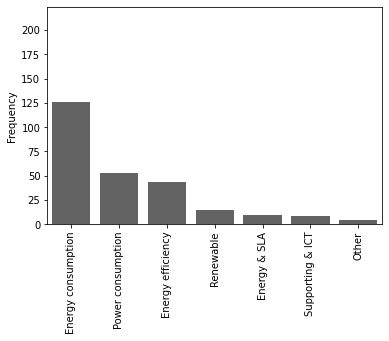

In [10]:
### ENERGY METRICS

# prepare data
category = 'energy_metrics'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'Power consumption':list_labels.count('power_cons'), 'Energy consumption':list_labels.count('energy_cons'), 'Renewable':list_labels.count('renewable'), 'Energy efficiency':list_labels.count('EE'), 'Energy & SLA':list_labels.count('energy_SLA'), 'Supporting & ICT':list_labels.count('supp_ICT'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Energy related metrics"  
make_hist(dict_labels, category_name, scale)

{'Resource': 44, 'VM': 58, 'Time': 56, 'Cost': 20, 'Network': 29, 'SLA': 56, 'Algorithm': 16, 'Other': 14, 'PM': 28, 'Workload': 45, 'Supporting': 5, 'Footprint': 8}


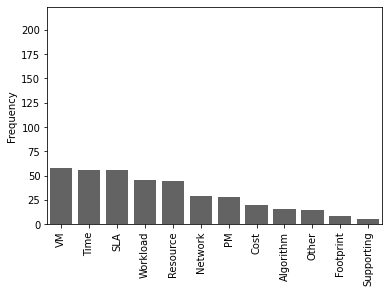

In [11]:
### OTHER METRICS

# prepare data
category = 'other_metrics'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'Resource':list_labels.count('resource'), 'VM':list_labels.count('VM'), 'Time':list_labels.count('time'), 'Cost':list_labels.count('cost'), 'Network':list_labels.count('network'), 'SLA':list_labels.count('SLA'), 'Algorithm':list_labels.count('algorithm'), 'Other':list_labels.count('other'), 'PM':list_labels.count('PM'), 'Workload':list_labels.count('workload'), 'Supporting':list_labels.count('support'), 'Footprint':list_labels.count('footprint')})
print(dict_labels)

# plot
category_name = df_name + ": Other metrics" 
make_hist(dict_labels, category_name, scale)

{'Other': 1, 'Empirical': 42, 'Simulated': 158, 'Theoretical': 26}


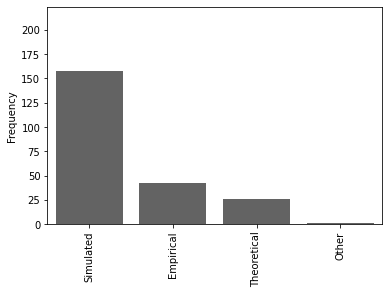

In [12]:
### EVALUATION

# prepare data
category = 'evaluation'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'Other':list_labels.count('other'), 'Empirical':list_labels.count('empirical'), 'Simulated':list_labels.count('simulated'), 'Theoretical':list_labels.count('theoretical')})
print(dict_labels)

# plot
category_name = df_name + ": Evaluation" 
make_hist(dict_labels, category_name, scale)

{'Server': 133, 'CPU': 41, 'Storage': 5, 'Memory': 18, 'DC': 19, 'Network': 49}


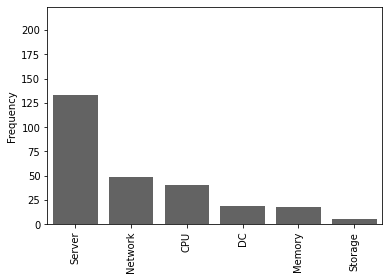

In [13]:
### DC COMPONENT

# prepare data
category = 'component'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'Server':list_labels.count('server'), 'CPU':list_labels.count('CPU'), 'Storage':list_labels.count('storage'), 'Memory':list_labels.count('memory'), 'DC':list_labels.count('DC'), 'Network':list_labels.count('network')})
print(dict_labels)

# plot
category_name = df_name + ": Data center component"
make_hist(dict_labels, category_name, scale)

{'Cloud': 122, 'Geo-distributed': 11, 'Renewable': 9, 'Heterogeneous': 18, 'Large-scale': 11, 'Homogeneous': 3, 'Other': 9, 'Small-scale': 3, 'Medium-scale': 3, 'Virtual': 15}


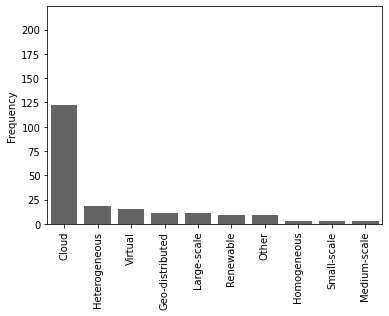

In [14]:
### DC TYPE    

# prepare data
category = 'dc_type'
df_labels, list_labels, n_labels = prepare_labels(data, category)

# count frequencies
dict_labels = ({'Cloud':list_labels.count('cloud'), 'Geo-distributed':list_labels.count('geo-distributed'), 'Renewable':list_labels.count('renewable'), 'Heterogeneous':list_labels.count('heterogeneous'), 'Large-scale':list_labels.count('large'), 'Homogeneous':list_labels.count('homogeneous'), 'Other':list_labels.count('other'), 'Small-scale':list_labels.count('small'), 'Medium-scale':list_labels.count('medium'), 'Virtual':list_labels.count('vDC')})
print(dict_labels)

# plot
category_name = df_name + ": Data center type"
make_hist(dict_labels, category_name, scale)

# merged strategies

{'VM consolidation': 100, 'Resource': 79, 'Monitor': 34, 'Network': 31, 'Container': 6}


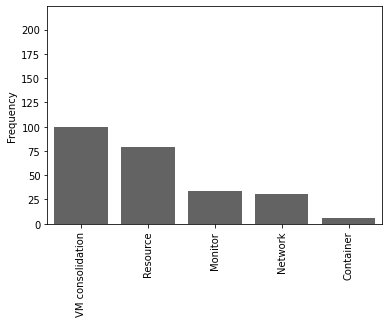

In [15]:
### MERGED STRATEGY TYPE

# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(data,category)

# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Monitor':list_labels.count('predict')+list_labels.count('model')+list_labels.count('measure'), 'Network':list_labels.count('network_optimization'), 'Container':list_labels.count('containerization')})
print(dict_labels)

# plot
category_name = "All data: Merged strategy type" 
make_hist(dict_labels, category_name, scale)

# make plots for all merged strategy types

### VM Consolidation

In [16]:
# VM CONSOLIDATION

df_vm = data[data['strategy'].str.contains("VM_consolidation")]
df_name = "Strategy = VM consolidation"
scale = len(df_vm.index)
print(scale)

100


{'Reduce energy': 64, 'Monitor': 3, 'Increase EE': 33, 'Reduce costs': 3, 'Renewable': 1}


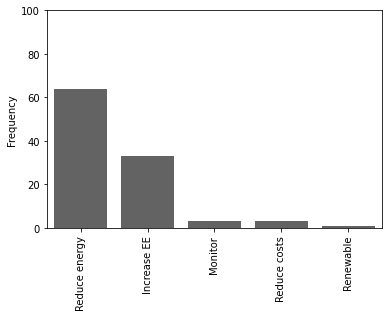

In [17]:
### GOAL

# prepare data
category = 'goal'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count and print frequencies 
dict_labels = ({'Reduce energy':list_labels.count('reduce_energy'), 'Monitor':list_labels.count('monitor'), 'Increase EE':list_labels.count('increase_EE'), 'Reduce costs':list_labels.count('reduce_cost'), 'Renewable':list_labels.count('optimize_renewable')})
print(dict_labels)
    
# plot
category_name = df_name + ": Energy related goal"
make_hist(dict_labels, category_name, scale)

{'VM consolidation': 100, 'Resource': 11, 'Predict': 2, 'Model': 2, 'VM placement': 34, 'VM selection': 12, 'Network': 1, 'VM migration': 26, 'Measure': 0, 'Container': 1, 'Other': 0}


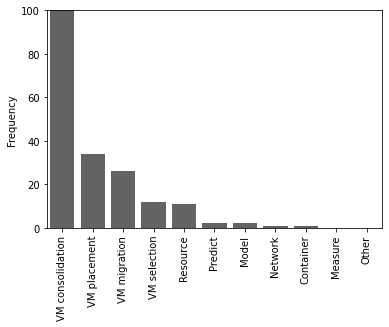

In [18]:
### STRATEGY

# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Predict':list_labels.count('predict'), 'Model':list_labels.count('model'), 'VM placement':list_labels.count('VM_placement'), 'VM selection':list_labels.count('VM_selection'), 'Network':list_labels.count('network_optimization'), 'VM migration':list_labels.count('VM_migration'), 'Measure':list_labels.count('measure'), 'Container':list_labels.count('containerization'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Strategy type"
make_hist(dict_labels, category_name, scale)

{'Nature': 14, 'ML': 12, 'Fit': 13, 'LP': 3, 'Other': 32, 'GP': 5, 'Fuzzy': 1, 'DVFS': 2}


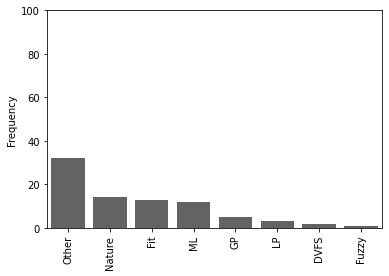

In [19]:
### ALGORITMS

# prepare data
category = 'algorithms'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'Nature':list_labels.count('nature'), 'ML':list_labels.count('ML'), 'Fit':list_labels.count('fit'), 'LP':list_labels.count('LP'), 'Other':list_labels.count('other') + list_labels.count('round_robin'), 'GP':list_labels.count('GP'), 'Fuzzy':list_labels.count('fuzzy'), 'DVFS':list_labels.count('DVFS')})
print(dict_labels)

# plot
category_name = df_name + ": Algorithms and techniques"
make_hist(dict_labels, category_name, scale)

{'Completely': 99, 'Depends': 0, 'Partly': 1}


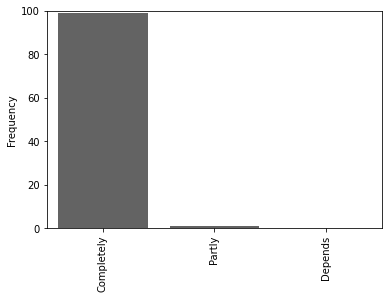

In [20]:
### SOFTWARE-DRIVEN

# prepare data
category = 'software-driven'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'Completely':list_labels.count('completely_consists_of'), 'Depends':list_labels.count('depends_on'), 'Partly':list_labels.count('partly_consists_of')})
print(dict_labels)

# plot
category_name = df_name + ": Software-driven" 
make_hist(dict_labels, category_name, scale)

{'Power consumption': 28, 'Energy consumption': 63, 'Renewable': 2, 'Energy efficiency': 11, 'Energy & SLA': 9, 'Supporting & ICT': 1, 'Other': 2}


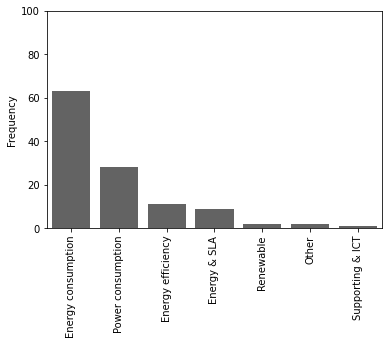

In [21]:
### ENERGY METRICS

# prepare data
category = 'energy_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'Power consumption':list_labels.count('power_cons'), 'Energy consumption':list_labels.count('energy_cons'), 'Renewable':list_labels.count('renewable'), 'Energy efficiency':list_labels.count('EE'), 'Energy & SLA':list_labels.count('energy_SLA'), 'Supporting & ICT':list_labels.count('supp_ICT'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Energy related metrics"  
make_hist(dict_labels, category_name, scale)

{'Resource': 26, 'VM': 46, 'Time': 23, 'Cost': 5, 'Network': 3, 'SLA': 40, 'Algorithm': 3, 'Other': 4, 'PM': 20, 'Workload': 18, 'Supporting': 0, 'Footprint': 1}


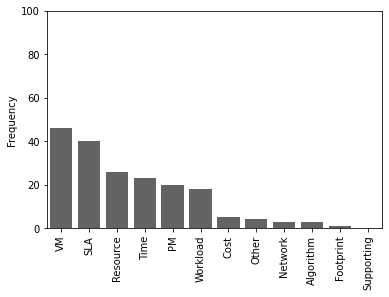

In [22]:
### OTHER METRICS

# prepare data
category = 'other_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'Resource':list_labels.count('resource'), 'VM':list_labels.count('VM'), 'Time':list_labels.count('time'), 'Cost':list_labels.count('cost'), 'Network':list_labels.count('network'), 'SLA':list_labels.count('SLA'), 'Algorithm':list_labels.count('algorithm'), 'Other':list_labels.count('other'), 'PM':list_labels.count('PM'), 'Workload':list_labels.count('workload'), 'Supporting':list_labels.count('support'), 'Footprint':list_labels.count('footprint')})
print(dict_labels)

# plot
category_name = df_name + ": Other metrics" 
make_hist(dict_labels, category_name, scale)

{'Other': 0, 'Empirical': 23, 'Simulated': 71, 'Theoretical': 7}


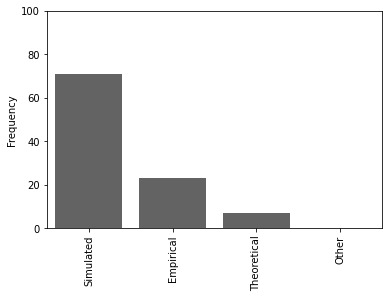

In [23]:
### EVALUATION

# prepare data
category = 'evaluation'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'Other':list_labels.count('other'), 'Empirical':list_labels.count('empirical'), 'Simulated':list_labels.count('simulated'), 'Theoretical':list_labels.count('theoretical')})
print(dict_labels)

# plot
category_name = df_name + ": Evaluation" 
make_hist(dict_labels, category_name, scale)

{'Server': 70, 'CPU': 30, 'Storage': 4, 'Memory': 13, 'DC': 3, 'Network': 14}


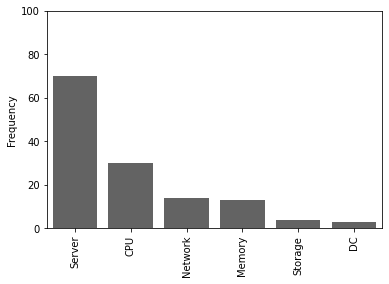

In [24]:
### DC COMPONENT

# prepare data
category = 'component'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'Server':list_labels.count('server'), 'CPU':list_labels.count('CPU'), 'Storage':list_labels.count('storage'), 'Memory':list_labels.count('memory'), 'DC':list_labels.count('DC'), 'Network':list_labels.count('network')})
print(dict_labels)

# plot
category_name = df_name + ": Data center component"
make_hist(dict_labels, category_name, scale)

{'Cloud': 70, 'Geo-distributed': 4, 'Renewable': 0, 'Heterogeneous': 9, 'Large-scale': 7, 'Homogeneous': 1, 'Other': 1, 'Small-scale': 2, 'Medium-scale': 2, 'Virtual': 7}


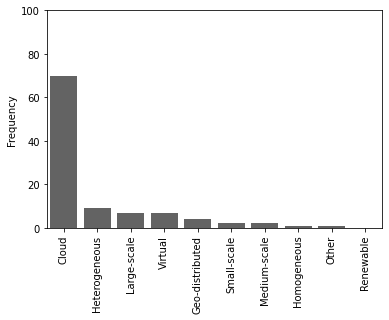

In [25]:
### DC TYPE    

# prepare data
category = 'dc_type'
df_labels, list_labels, n_labels = prepare_labels(df_vm, category)

# count frequencies
dict_labels = ({'Cloud':list_labels.count('cloud'), 'Geo-distributed':list_labels.count('geo-distributed'), 'Renewable':list_labels.count('renewable'), 'Heterogeneous':list_labels.count('heterogeneous'), 'Large-scale':list_labels.count('large'), 'Homogeneous':list_labels.count('homogeneous'), 'Other':list_labels.count('other'), 'Small-scale':list_labels.count('small'), 'Medium-scale':list_labels.count('medium'), 'Virtual':list_labels.count('vDC')})
print(dict_labels)

# plot
category_name = df_name + ": Data center type"
make_hist(dict_labels, category_name, scale)

### Resource Management

In [26]:
# RESOURCE MANAGEMENT

df_resource = data[data['strategy'].str.contains("resource_management")]
df_name = "Strategy = Resource management"
scale = len(df_resource.index)
print(scale)

79


{'Reduce energy': 31, 'Monitor': 4, 'Increase EE': 33, 'Reduce costs': 5, 'Renewable': 14}


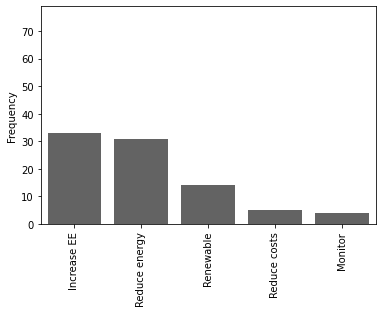

In [27]:
### GOAL

# prepare data
category = 'goal'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count and print frequencies 
dict_labels = ({'Reduce energy':list_labels.count('reduce_energy'), 'Monitor':list_labels.count('monitor'), 'Increase EE':list_labels.count('increase_EE'), 'Reduce costs':list_labels.count('reduce_cost'), 'Renewable':list_labels.count('optimize_renewable')})
print(dict_labels)
    
# plot
category_name = df_name + ": Energy related goal"
make_hist(dict_labels, category_name, scale)

{'VM consolidation': 11, 'Resource': 79, 'Predict': 2, 'Model': 3, 'VM placement': 3, 'VM selection': 3, 'Network': 2, 'VM migration': 5, 'Measure': 0, 'Container': 0, 'Other': 3}


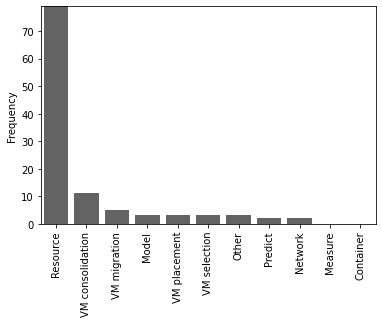

In [28]:
### STRATEGY

# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Predict':list_labels.count('predict'), 'Model':list_labels.count('model'), 'VM placement':list_labels.count('VM_placement'), 'VM selection':list_labels.count('VM_selection'), 'Network':list_labels.count('network_optimization'), 'VM migration':list_labels.count('VM_migration'), 'Measure':list_labels.count('measure'), 'Container':list_labels.count('containerization'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Strategy type"
make_hist(dict_labels, category_name, scale)

{'Nature': 5, 'ML': 18, 'Fit': 6, 'LP': 6, 'Other': 16, 'GP': 4, 'Fuzzy': 2, 'DVFS': 3}


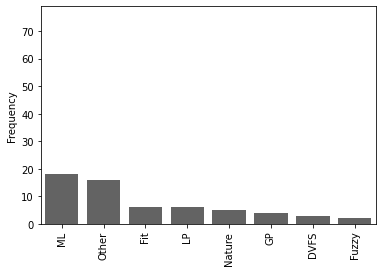

In [29]:
### ALGORITMS

# prepare data
category = 'algorithms'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'Nature':list_labels.count('nature'), 'ML':list_labels.count('ML'), 'Fit':list_labels.count('fit'), 'LP':list_labels.count('LP'), 'Other':list_labels.count('other') + list_labels.count('round_robin'), 'GP':list_labels.count('GP'), 'Fuzzy':list_labels.count('fuzzy'), 'DVFS':list_labels.count('DVFS')})
print(dict_labels)

# plot
category_name = df_name + ": Algorithms and techniques"
make_hist(dict_labels, category_name, scale)

{'Completely': 77, 'Depends': 1, 'Partly': 1}


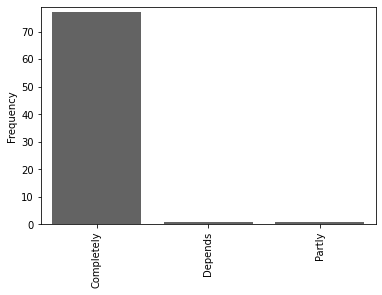

In [30]:
### SOFTWARE-DRIVEN

# prepare data
category = 'software-driven'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'Completely':list_labels.count('completely_consists_of'), 'Depends':list_labels.count('depends_on'), 'Partly':list_labels.count('partly_consists_of')})
print(dict_labels)

# plot
category_name = df_name + ": Software-driven" 
make_hist(dict_labels, category_name, scale)

{'Power consumption': 14, 'Energy consumption': 45, 'Renewable': 11, 'Energy efficiency': 18, 'Energy & SLA': 1, 'Supporting & ICT': 2, 'Other': 3}


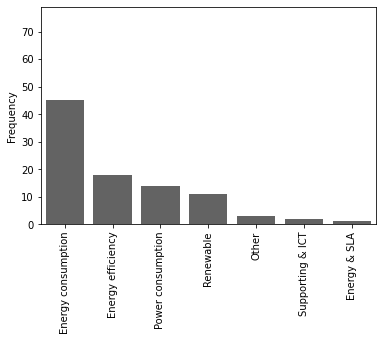

In [31]:
### ENERGY METRICS

# prepare data
category = 'energy_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'Power consumption':list_labels.count('power_cons'), 'Energy consumption':list_labels.count('energy_cons'), 'Renewable':list_labels.count('renewable'), 'Energy efficiency':list_labels.count('EE'), 'Energy & SLA':list_labels.count('energy_SLA'), 'Supporting & ICT':list_labels.count('supp_ICT'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Energy related metrics"  
make_hist(dict_labels, category_name, scale)

{'Resource': 17, 'VM': 15, 'Time': 25, 'Cost': 12, 'Network': 5, 'SLA': 17, 'Algorithm': 10, 'Other': 9, 'PM': 7, 'Workload': 22, 'Supporting': 2, 'Footprint': 4}


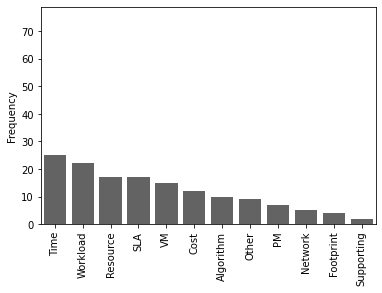

In [32]:
### OTHER METRICS

# prepare data
category = 'other_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'Resource':list_labels.count('resource'), 'VM':list_labels.count('VM'), 'Time':list_labels.count('time'), 'Cost':list_labels.count('cost'), 'Network':list_labels.count('network'), 'SLA':list_labels.count('SLA'), 'Algorithm':list_labels.count('algorithm'), 'Other':list_labels.count('other'), 'PM':list_labels.count('PM'), 'Workload':list_labels.count('workload'), 'Supporting':list_labels.count('support'), 'Footprint':list_labels.count('footprint')})
print(dict_labels)

# plot
category_name = df_name + ": Other metrics" 
make_hist(dict_labels, category_name, scale)

{'Other': 0, 'Empirical': 16, 'Simulated': 58, 'Theoretical': 7}


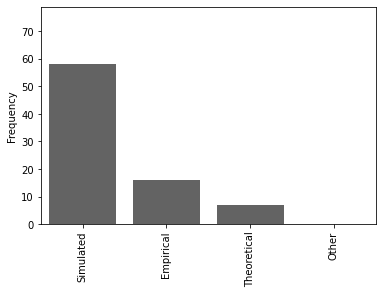

In [33]:
### EVALUATION

# prepare data
category = 'evaluation'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'Other':list_labels.count('other'), 'Empirical':list_labels.count('empirical'), 'Simulated':list_labels.count('simulated'), 'Theoretical':list_labels.count('theoretical')})
print(dict_labels)

# plot
category_name = df_name + ": Evaluation" 
make_hist(dict_labels, category_name, scale)

{'Server': 63, 'CPU': 14, 'Storage': 0, 'Memory': 5, 'DC': 5, 'Network': 10}


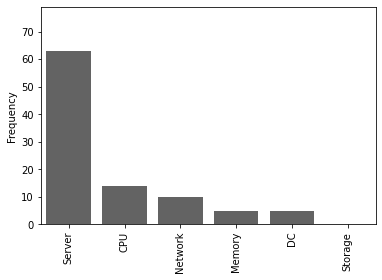

In [34]:
### DC COMPONENT

# prepare data
category = 'component'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'Server':list_labels.count('server'), 'CPU':list_labels.count('CPU'), 'Storage':list_labels.count('storage'), 'Memory':list_labels.count('memory'), 'DC':list_labels.count('DC'), 'Network':list_labels.count('network')})
print(dict_labels)

# plot
category_name = df_name + ": Data center component"
make_hist(dict_labels, category_name, scale)

{'Cloud': 41, 'Geo-distributed': 4, 'Renewable': 8, 'Heterogeneous': 6, 'Large-scale': 2, 'Homogeneous': 2, 'Other': 2, 'Small-scale': 1, 'Medium-scale': 1, 'Virtual': 4}


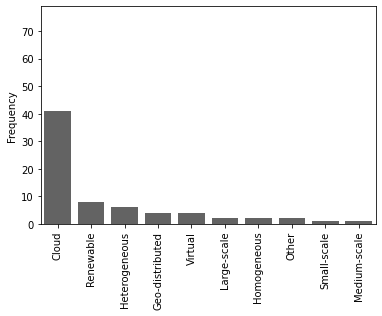

In [35]:
### DC TYPE    

# prepare data
category = 'dc_type'
df_labels, list_labels, n_labels = prepare_labels(df_resource, category)

# count frequencies
dict_labels = ({'Cloud':list_labels.count('cloud'), 'Geo-distributed':list_labels.count('geo-distributed'), 'Renewable':list_labels.count('renewable'), 'Heterogeneous':list_labels.count('heterogeneous'), 'Large-scale':list_labels.count('large'), 'Homogeneous':list_labels.count('homogeneous'), 'Other':list_labels.count('other'), 'Small-scale':list_labels.count('small'), 'Medium-scale':list_labels.count('medium'), 'Virtual':list_labels.count('vDC')})
print(dict_labels)

# plot
category_name = df_name + ": Data center type"
make_hist(dict_labels, category_name, scale)

### Monitor

In [36]:
# MONITOR

# merge predict, model and measure
monitor_labels = ["model","predict","measure"]
pattern = '|'.join(r"\b{}\b".format(x) for x in monitor_labels)
df_monitor = data[data['strategy'].str.contains(pattern)]
df_name = "Strategy = Monitor"
scale = len(df_monitor.index)
print(scale)

27


{'Reduce energy': 5, 'Monitor': 22, 'Increase EE': 6, 'Reduce costs': 2, 'Renewable': 0}


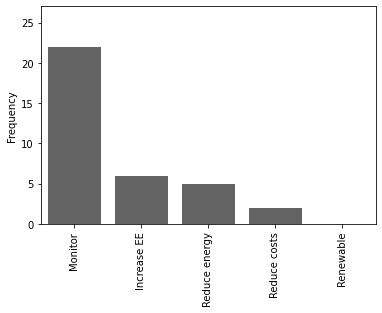

In [37]:
### GOAL

# prepare data
category = 'goal'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count and print frequencies 
dict_labels = ({'Reduce energy':list_labels.count('reduce_energy'), 'Monitor':list_labels.count('monitor'), 'Increase EE':list_labels.count('increase_EE'), 'Reduce costs':list_labels.count('reduce_cost'), 'Renewable':list_labels.count('optimize_renewable')})
print(dict_labels)
    
# plot
category_name = df_name + ": Energy related goal"
make_hist(dict_labels, category_name, scale)

{'VM consolidation': 4, 'Resource': 5, 'Predict': 14, 'Model': 15, 'VM placement': 1, 'VM selection': 0, 'Network': 0, 'VM migration': 1, 'Measure': 5, 'Container': 0, 'Other': 2}


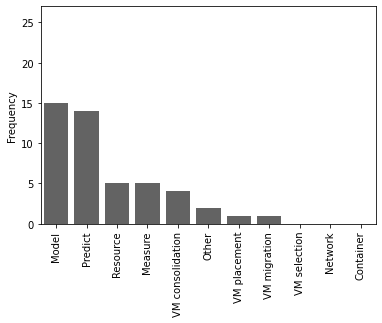

In [38]:
### STRATEGY

# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Predict':list_labels.count('predict'), 'Model':list_labels.count('model'), 'VM placement':list_labels.count('VM_placement'), 'VM selection':list_labels.count('VM_selection'), 'Network':list_labels.count('network_optimization'), 'VM migration':list_labels.count('VM_migration'), 'Measure':list_labels.count('measure'), 'Container':list_labels.count('containerization'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Strategy type"
make_hist(dict_labels, category_name, scale)

{'Nature': 2, 'ML': 5, 'Fit': 2, 'LP': 0, 'Other': 13, 'GP': 0, 'Fuzzy': 0, 'DVFS': 0}


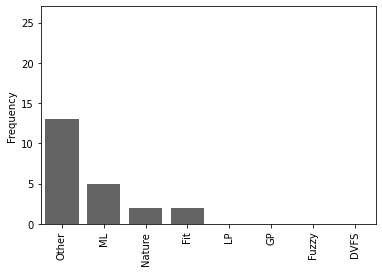

In [39]:
### ALGORITMS

# prepare data
category = 'algorithms'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'Nature':list_labels.count('nature'), 'ML':list_labels.count('ML'), 'Fit':list_labels.count('fit'), 'LP':list_labels.count('LP'), 'Other':list_labels.count('other') + list_labels.count('round_robin'), 'GP':list_labels.count('GP'), 'Fuzzy':list_labels.count('fuzzy'), 'DVFS':list_labels.count('DVFS')})
print(dict_labels)

# plot
category_name = df_name + ": Algorithms and techniques"
make_hist(dict_labels, category_name, scale)

{'Completely': 17, 'Depends': 7, 'Partly': 3}


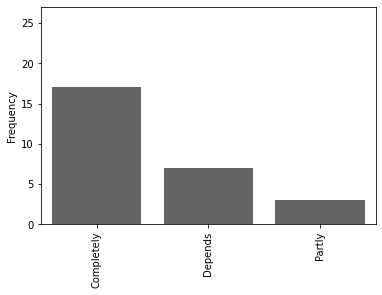

In [40]:
### SOFTWARE-DRIVEN

# prepare data
category = 'software-driven'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'Completely':list_labels.count('completely_consists_of'), 'Depends':list_labels.count('depends_on'), 'Partly':list_labels.count('partly_consists_of')})
print(dict_labels)

# plot
category_name = df_name + ": Software-driven" 
make_hist(dict_labels, category_name, scale)

{'Power consumption': 6, 'Energy consumption': 15, 'Renewable': 2, 'Energy efficiency': 7, 'Energy & SLA': 1, 'Supporting & ICT': 5, 'Other': 0}


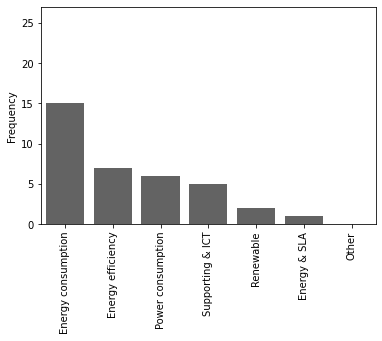

In [41]:
### ENERGY METRICS

# prepare data
category = 'energy_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'Power consumption':list_labels.count('power_cons'), 'Energy consumption':list_labels.count('energy_cons'), 'Renewable':list_labels.count('renewable'), 'Energy efficiency':list_labels.count('EE'), 'Energy & SLA':list_labels.count('energy_SLA'), 'Supporting & ICT':list_labels.count('supp_ICT'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Energy related metrics"  
make_hist(dict_labels, category_name, scale)

{'Resource': 4, 'VM': 2, 'Time': 3, 'Cost': 3, 'Network': 1, 'SLA': 2, 'Algorithm': 6, 'Other': 1, 'PM': 0, 'Workload': 5, 'Supporting': 3, 'Footprint': 3}


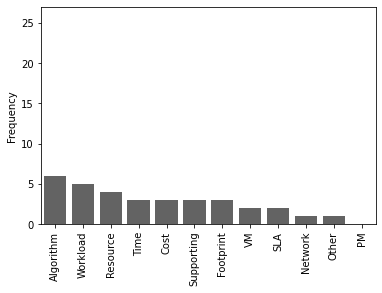

In [42]:
### OTHER METRICS

# prepare data
category = 'other_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'Resource':list_labels.count('resource'), 'VM':list_labels.count('VM'), 'Time':list_labels.count('time'), 'Cost':list_labels.count('cost'), 'Network':list_labels.count('network'), 'SLA':list_labels.count('SLA'), 'Algorithm':list_labels.count('algorithm'), 'Other':list_labels.count('other'), 'PM':list_labels.count('PM'), 'Workload':list_labels.count('workload'), 'Supporting':list_labels.count('support'), 'Footprint':list_labels.count('footprint')})
print(dict_labels)

# plot
category_name = df_name + ": Other metrics" 
make_hist(dict_labels, category_name, scale)

{'Other': 1, 'Empirical': 4, 'Simulated': 13, 'Theoretical': 10}


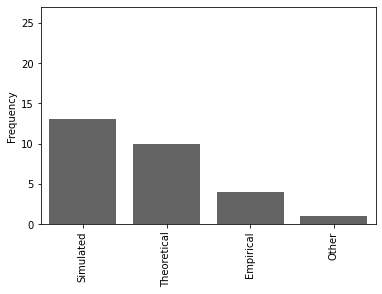

In [43]:
### EVALUATION

# prepare data
category = 'evaluation'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'Other':list_labels.count('other'), 'Empirical':list_labels.count('empirical'), 'Simulated':list_labels.count('simulated'), 'Theoretical':list_labels.count('theoretical')})
print(dict_labels)

# plot
category_name = df_name + ": Evaluation" 
make_hist(dict_labels, category_name, scale)

{'Server': 10, 'CPU': 2, 'Storage': 1, 'Memory': 1, 'DC': 11, 'Network': 4}


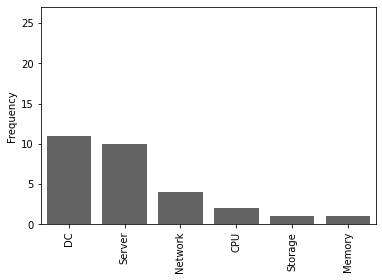

In [44]:
### DC COMPONENT

# prepare data
category = 'component'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'Server':list_labels.count('server'), 'CPU':list_labels.count('CPU'), 'Storage':list_labels.count('storage'), 'Memory':list_labels.count('memory'), 'DC':list_labels.count('DC'), 'Network':list_labels.count('network')})
print(dict_labels)

# plot
category_name = df_name + ": Data center component"
make_hist(dict_labels, category_name, scale)

{'Cloud': 12, 'Geo-distributed': 3, 'Renewable': 0, 'Heterogeneous': 1, 'Large-scale': 1, 'Homogeneous': 0, 'Other': 0, 'Small-scale': 0, 'Medium-scale': 0, 'Virtual': 4}


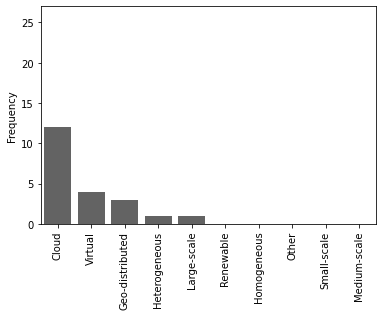

In [45]:
### DC TYPE    

# prepare data
category = 'dc_type'
df_labels, list_labels, n_labels = prepare_labels(df_monitor, category)

# count frequencies
dict_labels = ({'Cloud':list_labels.count('cloud'), 'Geo-distributed':list_labels.count('geo-distributed'), 'Renewable':list_labels.count('renewable'), 'Heterogeneous':list_labels.count('heterogeneous'), 'Large-scale':list_labels.count('large'), 'Homogeneous':list_labels.count('homogeneous'), 'Other':list_labels.count('other'), 'Small-scale':list_labels.count('small'), 'Medium-scale':list_labels.count('medium'), 'Virtual':list_labels.count('vDC')})
print(dict_labels)

# plot
category_name = df_name + ": Data center type"
make_hist(dict_labels, category_name, scale)

### Network Optimization

In [46]:
# NETWORK OPTIMIZATION

df_network = data[data['strategy'].str.contains("network_optimization")]
df_name = "Strategy = Network optimization"
scale = len(df_network.index)
print(scale)

31


{'Reduce energy': 15, 'Monitor': 0, 'Increase EE': 16, 'Reduce costs': 0, 'Renewable': 0}


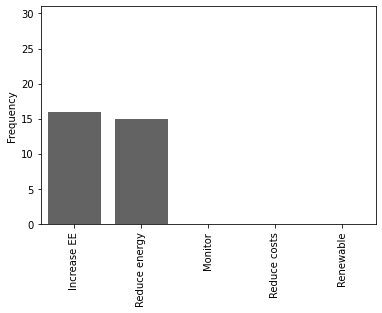

In [47]:
### GOAL

# prepare data
category = 'goal'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count and print frequencies 
dict_labels = ({'Reduce energy':list_labels.count('reduce_energy'), 'Monitor':list_labels.count('monitor'), 'Increase EE':list_labels.count('increase_EE'), 'Reduce costs':list_labels.count('reduce_cost'), 'Renewable':list_labels.count('optimize_renewable')})
print(dict_labels)
    
# plot
category_name = df_name + ": Energy related goal"
make_hist(dict_labels, category_name, scale)

{'VM consolidation': 1, 'Resource': 2, 'Predict': 0, 'Model': 0, 'VM placement': 0, 'VM selection': 0, 'Network': 31, 'VM migration': 1, 'Measure': 0, 'Container': 0, 'Other': 0}


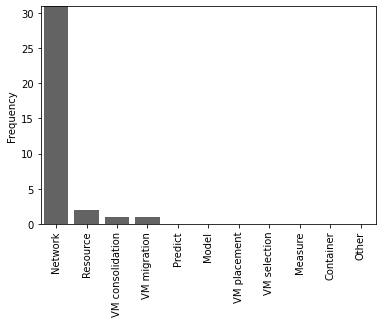

In [48]:
### STRATEGY

# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Predict':list_labels.count('predict'), 'Model':list_labels.count('model'), 'VM placement':list_labels.count('VM_placement'), 'VM selection':list_labels.count('VM_selection'), 'Network':list_labels.count('network_optimization'), 'VM migration':list_labels.count('VM_migration'), 'Measure':list_labels.count('measure'), 'Container':list_labels.count('containerization'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Strategy type"
make_hist(dict_labels, category_name, scale)

{'Nature': 4, 'ML': 3, 'Fit': 4, 'LP': 12, 'Other': 7, 'GP': 0, 'Fuzzy': 0, 'DVFS': 0}


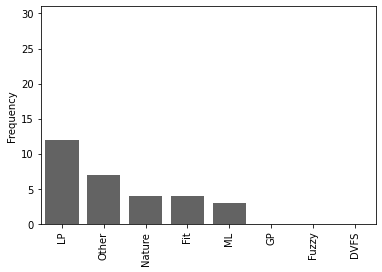

In [49]:
### ALGORITMS

# prepare data
category = 'algorithms'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'Nature':list_labels.count('nature'), 'ML':list_labels.count('ML'), 'Fit':list_labels.count('fit'), 'LP':list_labels.count('LP'), 'Other':list_labels.count('other') + list_labels.count('round_robin'), 'GP':list_labels.count('GP'), 'Fuzzy':list_labels.count('fuzzy'), 'DVFS':list_labels.count('DVFS')})
print(dict_labels)

# plot
category_name = df_name + ": Algorithms and techniques"
make_hist(dict_labels, category_name, scale)

{'Completely': 30, 'Depends': 0, 'Partly': 1}


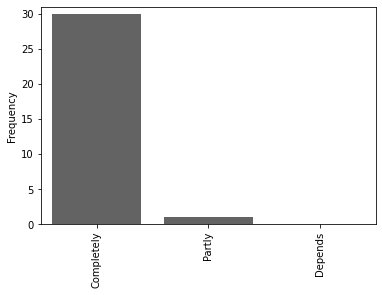

In [50]:
### SOFTWARE-DRIVEN

# prepare data
category = 'software-driven'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'Completely':list_labels.count('completely_consists_of'), 'Depends':list_labels.count('depends_on'), 'Partly':list_labels.count('partly_consists_of')})
print(dict_labels)

# plot
category_name = df_name + ": Software-driven" 
make_hist(dict_labels, category_name, scale)

{'Power consumption': 5, 'Energy consumption': 12, 'Renewable': 0, 'Energy efficiency': 12, 'Energy & SLA': 0, 'Supporting & ICT': 0, 'Other': 0}


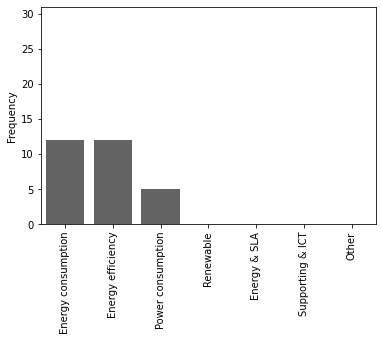

In [51]:
### ENERGY METRICS

# prepare data
category = 'energy_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'Power consumption':list_labels.count('power_cons'), 'Energy consumption':list_labels.count('energy_cons'), 'Renewable':list_labels.count('renewable'), 'Energy efficiency':list_labels.count('EE'), 'Energy & SLA':list_labels.count('energy_SLA'), 'Supporting & ICT':list_labels.count('supp_ICT'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Energy related metrics"  
make_hist(dict_labels, category_name, scale)

{'Resource': 2, 'VM': 2, 'Time': 10, 'Cost': 1, 'Network': 21, 'SLA': 1, 'Algorithm': 2, 'Other': 1, 'PM': 3, 'Workload': 5, 'Supporting': 0, 'Footprint': 0}


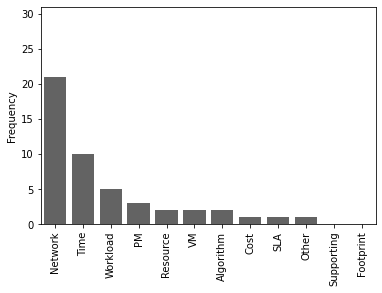

In [52]:
### OTHER METRICS

# prepare data
category = 'other_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'Resource':list_labels.count('resource'), 'VM':list_labels.count('VM'), 'Time':list_labels.count('time'), 'Cost':list_labels.count('cost'), 'Network':list_labels.count('network'), 'SLA':list_labels.count('SLA'), 'Algorithm':list_labels.count('algorithm'), 'Other':list_labels.count('other'), 'PM':list_labels.count('PM'), 'Workload':list_labels.count('workload'), 'Supporting':list_labels.count('support'), 'Footprint':list_labels.count('footprint')})
print(dict_labels)

# plot
category_name = df_name + ": Other metrics" 
make_hist(dict_labels, category_name, scale)

{'Other': 0, 'Empirical': 3, 'Simulated': 26, 'Theoretical': 3}


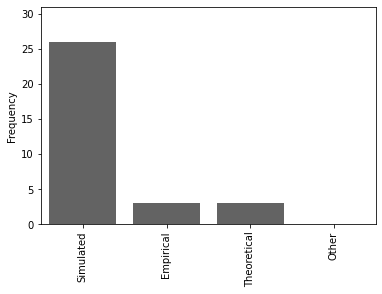

In [53]:
### EVALUATION

# prepare data
category = 'evaluation'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'Other':list_labels.count('other'), 'Empirical':list_labels.count('empirical'), 'Simulated':list_labels.count('simulated'), 'Theoretical':list_labels.count('theoretical')})
print(dict_labels)

# plot
category_name = df_name + ": Evaluation" 
make_hist(dict_labels, category_name, scale)

{'Server': 5, 'CPU': 1, 'Storage': 0, 'Memory': 1, 'DC': 1, 'Network': 26}


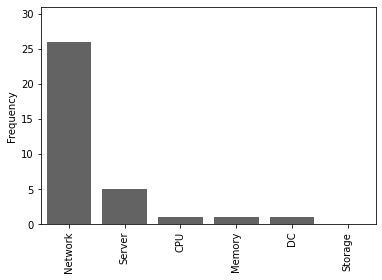

In [54]:
### DC COMPONENT

# prepare data
category = 'component'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'Server':list_labels.count('server'), 'CPU':list_labels.count('CPU'), 'Storage':list_labels.count('storage'), 'Memory':list_labels.count('memory'), 'DC':list_labels.count('DC'), 'Network':list_labels.count('network')})
print(dict_labels)

# plot
category_name = df_name + ": Data center component"
make_hist(dict_labels, category_name, scale)

{'Cloud': 6, 'Geo-distributed': 0, 'Renewable': 1, 'Heterogeneous': 0, 'Large-scale': 1, 'Homogeneous': 0, 'Other': 6, 'Small-scale': 0, 'Medium-scale': 0, 'Virtual': 4}


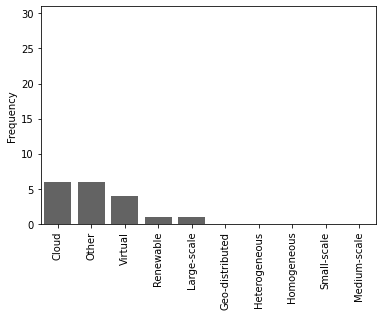

In [55]:
### DC TYPE    

# prepare data
category = 'dc_type'
df_labels, list_labels, n_labels = prepare_labels(df_network, category)

# count frequencies
dict_labels = ({'Cloud':list_labels.count('cloud'), 'Geo-distributed':list_labels.count('geo-distributed'), 'Renewable':list_labels.count('renewable'), 'Heterogeneous':list_labels.count('heterogeneous'), 'Large-scale':list_labels.count('large'), 'Homogeneous':list_labels.count('homogeneous'), 'Other':list_labels.count('other'), 'Small-scale':list_labels.count('small'), 'Medium-scale':list_labels.count('medium'), 'Virtual':list_labels.count('vDC')})
print(dict_labels)

# plot
category_name = df_name + ": Data center type"
make_hist(dict_labels, category_name, scale)

### Container Consolidation

In [56]:
# CONTAINER CONSOLIDATION

df_container = data[data['strategy'].str.contains("containerization")]
df_name = "Strategy = Container consolidation"
scale = len(df_container.index)
print(scale)

6


{'Reduce energy': 4, 'Monitor': 0, 'Increase EE': 2, 'Reduce costs': 0, 'Renewable': 0}


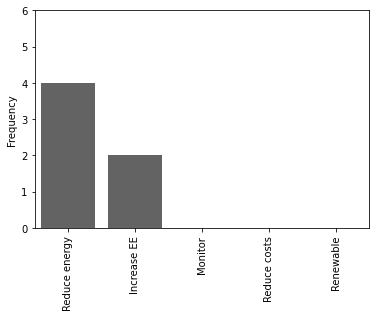

In [57]:
### GOAL

# prepare data
category = 'goal'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count and print frequencies 
dict_labels = ({'Reduce energy':list_labels.count('reduce_energy'), 'Monitor':list_labels.count('monitor'), 'Increase EE':list_labels.count('increase_EE'), 'Reduce costs':list_labels.count('reduce_cost'), 'Renewable':list_labels.count('optimize_renewable')})
print(dict_labels)
    
# plot
category_name = df_name + ": Energy related goal"
make_hist(dict_labels, category_name, scale)

{'VM consolidation': 1, 'Resource': 0, 'Predict': 0, 'Model': 0, 'VM placement': 0, 'VM selection': 0, 'Network': 0, 'VM migration': 0, 'Measure': 0, 'Container': 6, 'Other': 0}


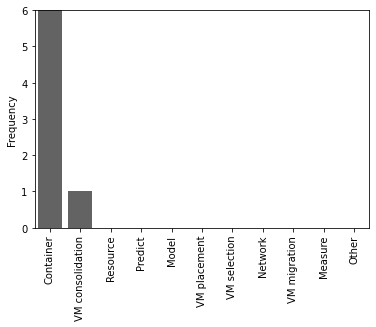

In [58]:
### STRATEGY

# prepare data
category = 'strategy'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'VM consolidation':list_labels.count('VM_consolidation'), 'Resource':list_labels.count('resource_management'), 'Predict':list_labels.count('predict'), 'Model':list_labels.count('model'), 'VM placement':list_labels.count('VM_placement'), 'VM selection':list_labels.count('VM_selection'), 'Network':list_labels.count('network_optimization'), 'VM migration':list_labels.count('VM_migration'), 'Measure':list_labels.count('measure'), 'Container':list_labels.count('containerization'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Strategy type"
make_hist(dict_labels, category_name, scale)

{'Nature': 1, 'ML': 0, 'Fit': 1, 'LP': 0, 'Other': 1, 'GP': 0, 'Fuzzy': 0, 'DVFS': 0}


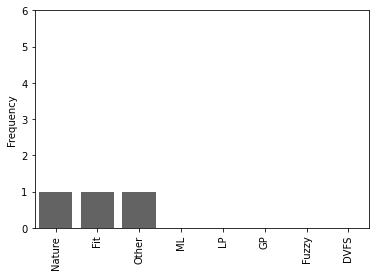

In [59]:
### ALGORITMS

# prepare data
category = 'algorithms'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'Nature':list_labels.count('nature'), 'ML':list_labels.count('ML'), 'Fit':list_labels.count('fit'), 'LP':list_labels.count('LP'), 'Other':list_labels.count('other') + list_labels.count('round_robin'), 'GP':list_labels.count('GP'), 'Fuzzy':list_labels.count('fuzzy'), 'DVFS':list_labels.count('DVFS')})
print(dict_labels)

# plot
category_name = df_name + ": Algorithms and techniques"
make_hist(dict_labels, category_name, scale)

{'Completely': 6, 'Depends': 0, 'Partly': 0}


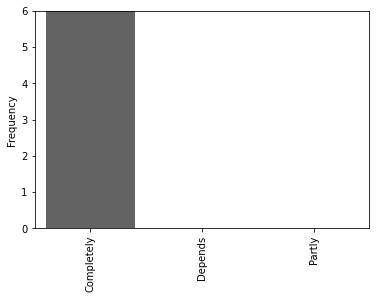

In [60]:
### SOFTWARE-DRIVEN

# prepare data
category = 'software-driven'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'Completely':list_labels.count('completely_consists_of'), 'Depends':list_labels.count('depends_on'), 'Partly':list_labels.count('partly_consists_of')})
print(dict_labels)

# plot
category_name = df_name + ": Software-driven" 
make_hist(dict_labels, category_name, scale)

{'Power consumption': 1, 'Energy consumption': 4, 'Renewable': 0, 'Energy efficiency': 1, 'Energy & SLA': 1, 'Supporting & ICT': 0, 'Other': 0}


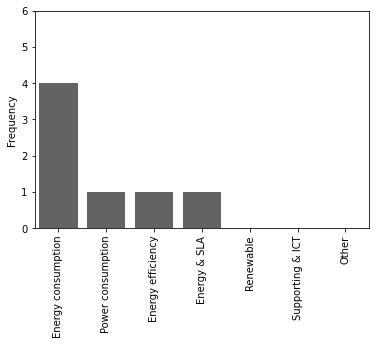

In [61]:
### ENERGY METRICS

# prepare data
category = 'energy_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'Power consumption':list_labels.count('power_cons'), 'Energy consumption':list_labels.count('energy_cons'), 'Renewable':list_labels.count('renewable'), 'Energy efficiency':list_labels.count('EE'), 'Energy & SLA':list_labels.count('energy_SLA'), 'Supporting & ICT':list_labels.count('supp_ICT'), 'Other':list_labels.count('other')})
print(dict_labels)

# plot
category_name = df_name + ": Energy related metrics"  
make_hist(dict_labels, category_name, scale)

{'Resource': 2, 'VM': 2, 'Time': 2, 'Cost': 0, 'Network': 1, 'SLA': 2, 'Algorithm': 0, 'Other': 2, 'PM': 1, 'Workload': 2, 'Supporting': 0, 'Footprint': 0}


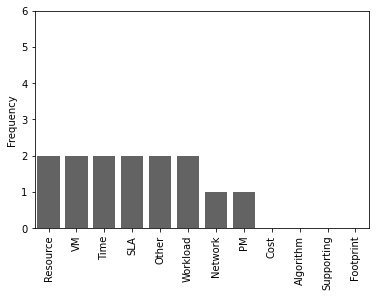

In [62]:
### OTHER METRICS

# prepare data
category = 'other_metrics'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'Resource':list_labels.count('resource'), 'VM':list_labels.count('VM'), 'Time':list_labels.count('time'), 'Cost':list_labels.count('cost'), 'Network':list_labels.count('network'), 'SLA':list_labels.count('SLA'), 'Algorithm':list_labels.count('algorithm'), 'Other':list_labels.count('other'), 'PM':list_labels.count('PM'), 'Workload':list_labels.count('workload'), 'Supporting':list_labels.count('support'), 'Footprint':list_labels.count('footprint')})
print(dict_labels)

# plot
category_name = df_name + ": Other metrics" 
make_hist(dict_labels, category_name, scale)

{'Other': 0, 'Empirical': 0, 'Simulated': 5, 'Theoretical': 1}


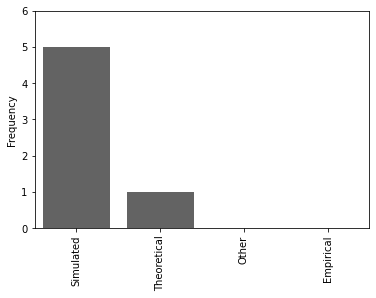

In [63]:
### EVALUATION

# prepare data
category = 'evaluation'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'Other':list_labels.count('other'), 'Empirical':list_labels.count('empirical'), 'Simulated':list_labels.count('simulated'), 'Theoretical':list_labels.count('theoretical')})
print(dict_labels)

# plot
category_name = df_name + ": Evaluation" 
make_hist(dict_labels, category_name, scale)

{'Server': 3, 'CPU': 0, 'Storage': 0, 'Memory': 0, 'DC': 0, 'Network': 0}


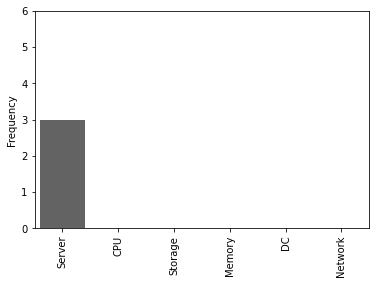

In [64]:
### DC COMPONENT

# prepare data
category = 'component'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'Server':list_labels.count('server'), 'CPU':list_labels.count('CPU'), 'Storage':list_labels.count('storage'), 'Memory':list_labels.count('memory'), 'DC':list_labels.count('DC'), 'Network':list_labels.count('network')})
print(dict_labels)

# plot
category_name = df_name + ": Data center component"
make_hist(dict_labels, category_name, scale)

{'Cloud': 6, 'Geo-distributed': 0, 'Renewable': 0, 'Heterogeneous': 1, 'Large-scale': 0, 'Homogeneous': 0, 'Other': 0, 'Small-scale': 0, 'Medium-scale': 0, 'Virtual': 0}


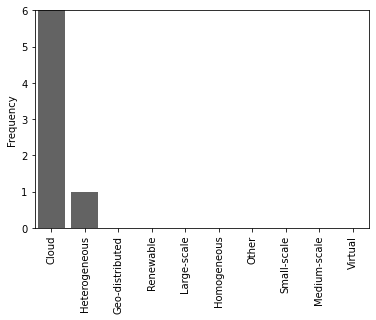

In [65]:
### DC TYPE    

# prepare data
category = 'dc_type'
df_labels, list_labels, n_labels = prepare_labels(df_container, category)

# count frequencies
dict_labels = ({'Cloud':list_labels.count('cloud'), 'Geo-distributed':list_labels.count('geo-distributed'), 'Renewable':list_labels.count('renewable'), 'Heterogeneous':list_labels.count('heterogeneous'), 'Large-scale':list_labels.count('large'), 'Homogeneous':list_labels.count('homogeneous'), 'Other':list_labels.count('other'), 'Small-scale':list_labels.count('small'), 'Medium-scale':list_labels.count('medium'), 'Virtual':list_labels.count('vDC')})
print(dict_labels)

# plot
category_name = df_name + ": Data center type"
make_hist(dict_labels, category_name, scale)